In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys, os; sys.path.append('../')
import BaryonForge as bfg
import pyccl as ccl

#Load cosmology object from CCL. Linear P(k) is needed since we use it for 2-halo term.
#We don't use P(k) anywhere else in this model, so it's ok to use linear P(k) throughout
cosmo = ccl.Cosmology(Omega_c = 0.26, Omega_b = 0.04, h = 0.7, sigma8 = 0.8, n_s = 0.96, matter_power_spectrum='linear')

#Config params. Can change as you need. I store these as a dict and then unpack.
bpar = np.load('./default_config.npy', allow_pickle = True)[()]

In [2]:
#Some plotting configs
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=22)
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]

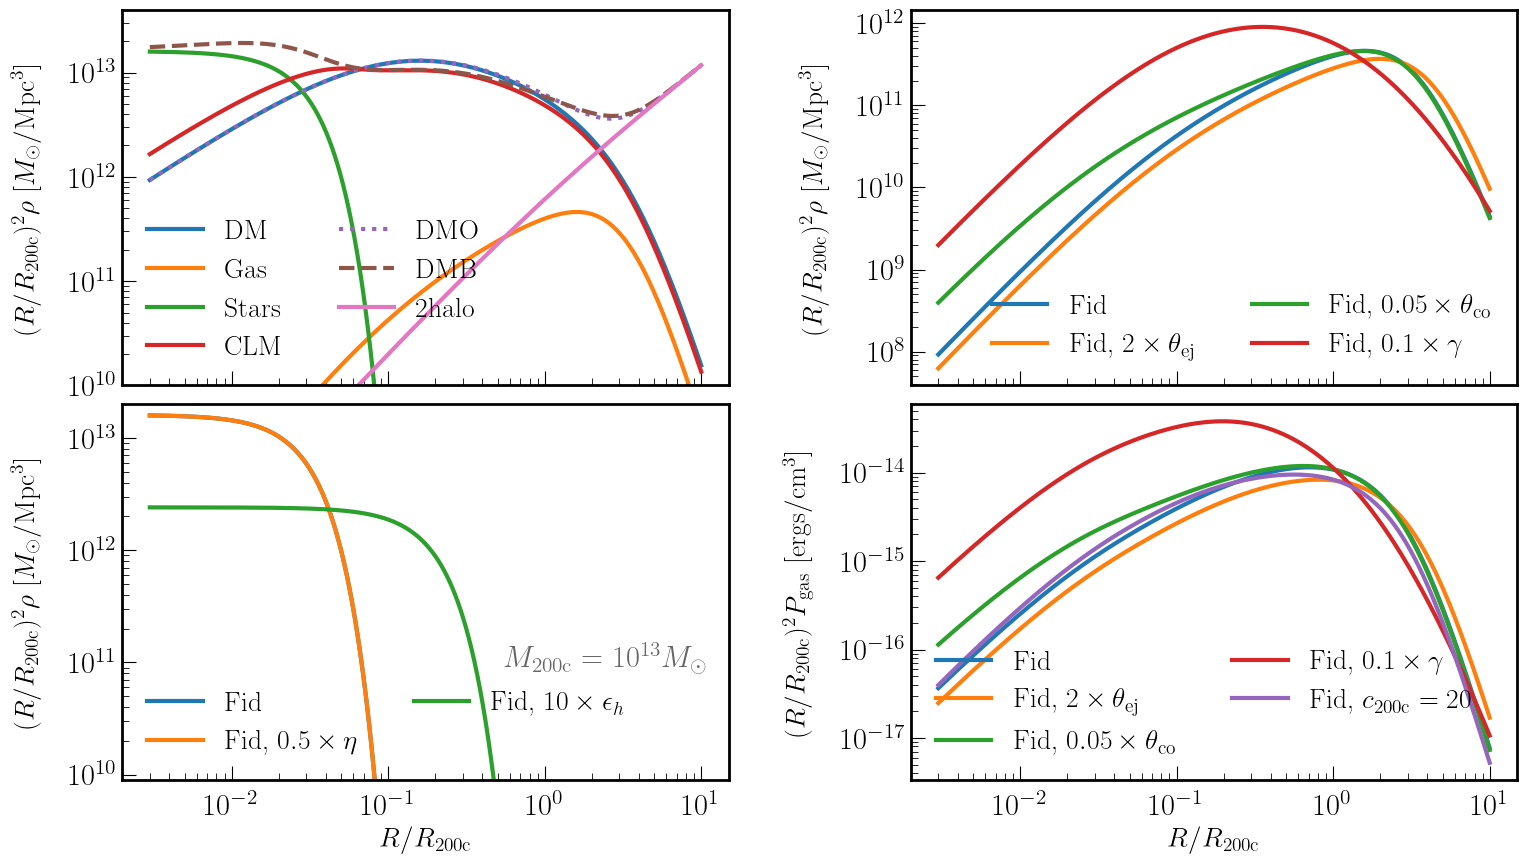

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10), sharex = True, sharey = False)
plt.subplots_adjust(hspace = 0.05, wspace = 0.3)
[a.set_xscale('log') for a in ax.flat]
[a.set_yscale('log') for a in ax.flat]

#convenience function to give new dictionary with just one param changed
def bpar_new(p):
    return {k:v for k,v in bpar.items() if k != p}

#Init the profiles using dictionary of params
DMO = bfg.Profiles.DarkMatterOnly(**bpar)
DMB = bfg.Profiles.DarkMatterBaryon(**bpar)
DM  = bfg.Profiles.DarkMatter(**bpar)
GAS = bfg.Profiles.Gas(**bpar)
STR = bfg.Profiles.Stars(**bpar)
CLM = bfg.Profiles.CollisionlessMatter(**bpar)
TH  = bfg.Profiles.TwoHalo(**bpar)

#Pick a mass, in Msun
M = 1e13
a = 1 #scale factor
R200c = ccl.halos.massdef.MassDef200c().get_radius(cosmo, M, a)
R = np.geomspace(0.003 * R200c, 10 * R200c, 1000)
x = R/R200c
mdef = ccl.halos.massdef.MassDef200c()


#First plot fiducial dist
ax.flat[0].plot(x, x**2 * DM.real(cosmo, R, np.array(M), a, mdef), lw = 3,  label = 'DM')
ax.flat[0].plot(x, x**2 * GAS.real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'Gas')
ax.flat[0].plot(x, x**2 * STR.real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'Stars')
ax.flat[0].plot(x, x**2 * CLM.real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'CLM')
ax.flat[0].plot(x, x**2 * DMO.real(cosmo, R, np.array(M), a, mdef), lw = 3, ls = ':', label = 'DMO')
ax.flat[0].plot(x, x**2 * DMB.real(cosmo, R, np.array(M), a, mdef), lw = 3, ls = '--', label = 'DMB')
ax.flat[0].plot(x, x**2 * TH.real(cosmo, R, np.array(M), a, mdef), lw = 3,  ls = '-', label = '2halo')
ax.flat[0].set_ylim(1e10, 4e13)


#Now the gas variations
ax.flat[1].plot(x, x**2 * GAS.real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'Fid')
ax.flat[1].plot(x, x**2 * bfg.Profiles.Gas(**bpar_new('theta_ej'), theta_ej = 5).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $2\times\theta_{\rm ej}$')
ax.flat[1].plot(x, x**2 * bfg.Profiles.Gas(**bpar_new('theta_co'), theta_co = 0.03).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $0.05\times\theta_{\rm co}$')
ax.flat[1].plot(x, x**2 * bfg.Profiles.Gas(**bpar_new('gamma'), gamma = 0.7).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $0.1\times \gamma$')

#Now the star variations
ax.flat[2].plot(x, x**2 * STR.real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'Fid')
ax.flat[2].plot(x, x**2 * bfg.Profiles.Stars(**bpar_new('eta'), eta = 0.3).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $0.5 \times \eta$')
ax.flat[2].plot(x, x**2 * bfg.Profiles.Stars(**bpar_new('epsilon_h'), epsilon_h = 0.1).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $10\times \epsilon_h$')
ax.flat[2].set_ylim(9e9, 2e13)

#Now the pressure profiles
ax.flat[3].plot(x, x**2 * bfg.Profiles.Pressure(**bpar).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = 'Fid')
ax.flat[3].plot(x, x**2 * bfg.Profiles.Pressure(**bpar_new('theta_ej'), theta_ej = 5).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $2\times\theta_{\rm ej}$')
ax.flat[3].plot(x, x**2 * bfg.Profiles.Pressure(**bpar_new('theta_co'), theta_co = 0.03).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $0.05\times\theta_{\rm co}$')
ax.flat[3].plot(x, x**2 * bfg.Profiles.Pressure(**bpar_new('gamma'),    gamma = 0.7).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $0.1\times \gamma$')
ax.flat[3].plot(x, x**2 * bfg.Profiles.Pressure(**bpar_new('cdelta'),   cdelta = 20).real(cosmo, R, np.array(M), a, mdef), lw = 3, label = r'Fid, $c_{\rm 200c} = 20$')


ax[0, 0].set_ylabel(r'$(R/R_{\rm 200c})^2\rho$  $[M_\odot/{\rm Mpc}^3]$', size = 20, labelpad = 20)
ax[0, 1].set_ylabel(r'$(R/R_{\rm 200c})^2\rho$  $[M_\odot/{\rm Mpc}^3]$', size = 20, labelpad = 20)
ax[1, 0].set_ylabel(r'$(R/R_{\rm 200c})^2\rho$  $[M_\odot/{\rm Mpc}^3]$', size = 20, labelpad = 20)
ax[1, 1].set_ylabel(r'$(R/R_{\rm 200c})^2 P_{\rm gas}$  $[\rm ergs/cm^3]$', size = 20, labelpad = 20)

ax[1, 0].set_xlabel(r'$R/R_{\rm 200c}$', size = 20)
ax[1, 1].set_xlabel(r'$R/R_{\rm 200c}$', size = 20)

ax[1, 0].tick_params(axis = 'x', pad = 10)
ax[1, 1].tick_params(axis = 'x', pad = 10)
ax[1, 0].text(0.63, 0.3, r'$M_{\rm 200c} = 10^{%d}M_\odot$' % int(np.log10(M)), size = 22,
              color = 'k', alpha = 0.6, ha = 'left', transform = ax[1, 0].transAxes)

[ax.flat[i].legend(fontsize = 20, frameon = False, ncol = 2) for i in range(4)]

plt.show()